[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/rhudaina/CENTREX-for-STEM-DepEd-QCSHS/blob/main/Intro_to_Image_Processing.ipynb)

## Load the Dependencies

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for matrix algebra and random number capabilities.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.

In [51]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

# What is a Digital Image?

A *digital image* is defined as a two-dimensional representation, i.e., picture, of some subject, usually a physical object or a person. The building blocks of digital images are *pixels* (picture elements). Because the pixels are so small and close together, our brain is able to assemble it into a meaningful image.

The number of pixels used to represent the image determines the amount of detail in the image, known as *resolution* in terms of number of pixels (height) $\times$ number of pixels (width).

## Black & White Image

In a black & white image, a black pixel is assigned a $0$ (no light), and a white pixel is assigned a $1$ (full light intensity).
The entire image is represented by matrix consisting of $1$s and $0$s.

Black and white images are called a $1$-bit image where each pixel is described by one bit (binary digit).

In [106]:
img_height = 10;
img_width  = 10;
numPixels = img_height * img_width;

p = 0.4   # probability of white pixels
M = np.random.binomial(1,p,numPixels).reshape((img_height,img_width))
print(M)

[[0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1 1 0 0]
 [0 0 1 0 1 0 0 1 0 1]
 [1 0 1 1 0 0 0 0 1 1]
 [1 0 0 0 1 1 1 0 0 0]
 [1 1 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 1 0 1]
 [1 0 1 1 0 0 0 1 1 0]
 [1 0 1 0 1 1 0 1 0 1]
 [0 0 0 1 0 0 0 0 0 0]]


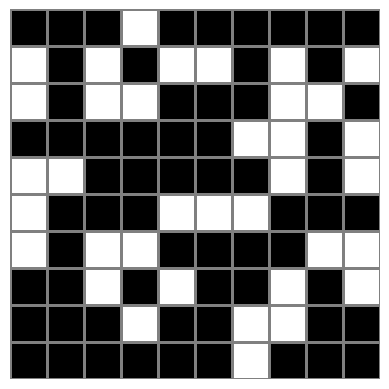

In [107]:
plt.pcolormesh(M, cmap='gray',edgecolors='gray')
ax = plt.gca()
ax.set_aspect('equal')
ax.axis("off")
plt.show()

In [108]:
M = np.zeros((25,20))
M[5:20,5:15] = 1;
print(M)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.

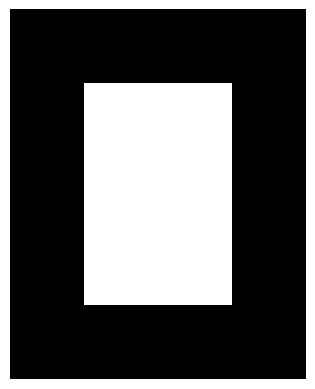

In [109]:
plt.pcolormesh(M, cmap='gray')
ax = plt.gca()
ax.set_aspect('equal')
ax.axis("off")
plt.show()

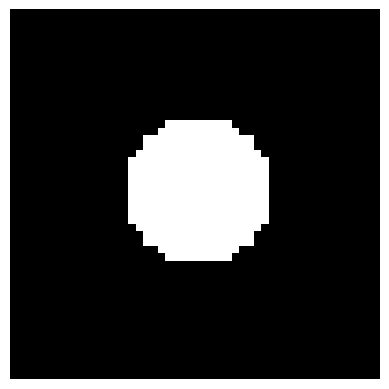

In [125]:
img_height = 50;
img_width  = 50;

cx = img_height/2;
cy = img_width/2;
rad = 10;

M = np.zeros((img_height,img_width))
I = np.ones((img_height,img_width))

for i in range(img_height):
  for j in range(img_width):
    if (i-cx)**2 + (j-cy)**2 < rad**2:
      M[i,j] = 1;

plt.pcolormesh(M, cmap='gray')
ax = plt.gca()
ax.set_aspect('equal')
ax.axis("off")
plt.show()

## Grayscale Image

Image Resolution: (154, 120)


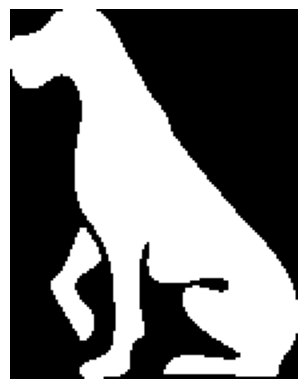

In [34]:
Img = cv.imread('image_bw.png',cv.IMREAD_UNCHANGED);  # reads digital image
Img[Img==np.max(Img)]=1;
print("Image Resolution:", Img.shape)

plt.imshow(Img, cmap='gray')
ax = plt.gca();
ax.grid(which='minor', color='g', linestyle='-', linewidth=2)
plt.axis("off")
plt.show()

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]]


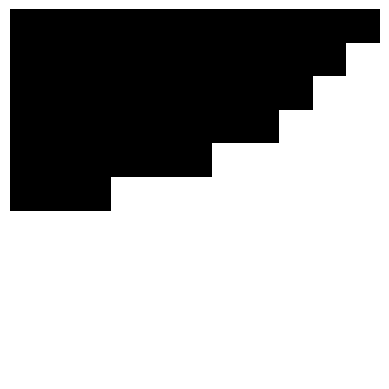

In [30]:
TopLeft = Img[5:16,5:16]
print(TopLeft)
plt.imshow(TopLeft,cmap='gray',interpolation='none')
plt.grid()
plt.axis("off")
plt.show()